In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import random
from mpl_toolkits.mplot3d import Axes3D

In [2]:
class Block:
    """
    Block class represents one element in the map, which holds parameters such as coordinates, position, color, presence of heart, and penalty based on agent.
    
    Parameters
    ----------
    Same parameters as the __init__() function, as it is the constructor
    """
    # Creating a block class to implement the actual blocks
    def __init__(self, x: int, y: int, number: int, color: str, isHeart: bool, penalty: float = None):
        """
        Parameters
        ----------
        x: int -> X-coordinate of the block
        y: int -> Y-coordinate of the block
        number: int -> Position of block
        color: str -> Color of the block
        isHeart: bool -> `True` if the block is heart, `False` if not.
        penalty: float -> Penalty laid on agent when landing on the block.
        """
        self.x = x
        self.y = y
        self.penalty = penalty
        self.number = number
        self.color = color
        self.isHeart = isHeart
    
    # Overriding string literal for easy printing
    def __str__(self):
        return f"POS: {(self.x, self.y)}\nNUM: {self.number}\nCLR: {self.color}\nHRT: {self.isHeart}\nPEN: {self.penalty}\n"
    
    # Overriding equal-to literal for easy comparision
    def __eq__(self, other):
        if isinstance(other, Block):
            return self.number == other.number

        return self.number == other

In [3]:
def initialise_map_data(_map):
    """
    Retrives the data from the provided map.
    Calculates following essential information:
        * length of the side
        * flattened map
        * position of heart
        * coordinates of heart
        * and heart color
    
    Parameters
    ----------
    _map: list -> The map of the matrix over which the agent moves.
    
    Returns
    -------
    side: int -> Length of side of the map
    flat_map: list -> Flattened map for position accessing
    heart_number: int -> Position of Heart
    heart_coordinates: tuple -> Coordinates of Heart for easy array accessing
    heart_color: str -> 'R' if Red, 'G' if Green
    """
    # Calculating side length
    side = len(_map)

    # Flattening the array
    flat_map = np.array(_map).reshape(side*side)

    # Searching for Red or Green heart and its position
    rh = np.where(flat_map == 'RH')[0]
    gh = np.where(flat_map == 'GH')[0]
    
    
    try:
        # Getting position of heart
        heart_number = (rh if rh.size>0 else gh)[0]
        
        # Converting position to coordinates
        heart_coordinates = (heart_number//side) ,(heart_number%side)
        
        # Retrieving color of heart
        heart_color = 'R' if rh.size>0 else 'G'

        print(f"Map Size: ({side} x {side})\nHeart Position: {heart_number}\nHeart Coordinates: {heart_coordinates}\nHeart Color: {heart_color}")

        return side, flat_map, heart_number, heart_coordinates, heart_color
    
    except:
        print("################################# EXCEPTION #####################################")
        print("Provide a heart on the map.\nFormat: `RH` if `Red Heart` or `GH` if `Green Heart`")
        
        return

In [4]:
def build_map(_map, agent):
    """
    Builds the map for given agent, with penalty rules mentioned in the problem.
    Looping for the map, looking for 'R', 'G', 'RH', and 'GH' meaning Red Block, Green Block, Red Heart, and Green Heart respectively.
    This function will create a Block class for each 'R', 'G', 'RH', and 'GH', with it's coordinates, color, position, presence of heart, and penalty.
    
    Parameters
    ----------
    _map: list -> The map of the matrix over which the agent moves.
    agent: int -> `R1` is indicated by 0, `G1` is indicated by 1
    
    Returns
    -------
    output_map: list -> List that represents the map with penalities
    """
    # Creating a output map which stores converted version of `_map`
    side = len(_map)
    output_map = [[] for i in range(side)]
    # Loop over sides
    for i in range(side):

        # Loop over blocks on each side
        for j in range(side):

            # Check for 'Red' block
            if _map[i][j] == 'R':
                # Adding coordinates, position, color, if its a Heart, and penalty based on requirements
                output_map[i].append(Block(x=i, 
                                           y=j, 
                                           number=((j)+(side*i)), 
                                           color=0, 
                                           isHeart=False, 
                                           penalty= ((abs(heart_coordinates[0]-i)+abs(heart_coordinates[1]-j)) + (-5 if heart_color=='R' else 5) + (-10 if agent==0 else 10) + 1)
                                          ))
            # Check for 'Green' block
            if _map[i][j] == 'G':
                # Adding coordinates, position, color, if its a Heart, and penalty based on requirements
                output_map[i].append(Block(x=i, 
                                           y=j, 
                                           number=((j)+(side*i)), 
                                           color=1, 
                                           isHeart=False, 
                                           penalty= ((abs(heart_coordinates[0]-i)+abs(heart_coordinates[1]-j)) + (-5 if heart_color=='G' else 5) + (-10 if agent==1 else 10) + 1)
                                          ))
            # Check for 'Green Heart' block
            if _map[i][j] == 'GH':
                # Adding coordinates, position, color, if its a Heart, and penalty based on requirements
                output_map[i].append(Block(x=i, 
                                           y=j, 
                                           number=((j)+(side*i)), 
                                           color=1, 
                                           isHeart=True, 
                                           penalty= ((abs(heart_coordinates[0]-i)+abs(heart_coordinates[1]-j)) + (-5 if heart_color=='G' else 5) + (-10 if agent==1 else 10) + 1)
                                          ))
            # Check for 'Red Heart' block
            if _map[i][j] == 'RH':
                # Adding coordinates, position, color, if its a Heart, and penalty based on requirements
                output_map[i].append(Block(x=i, 
                                           y=j, 
                                           number=((j)+(side*i)), 
                                           color=0, 
                                           isHeart=True, 
                                           penalty= ((abs(heart_coordinates[0]-i)+abs(heart_coordinates[1]-j)) + (-5 if heart_color=='R' else 5) + (-10 if agent==0 else 10) + 1)
                                          ))
    return output_map

In [5]:
def make_plots(output_map_R1, output_map_G1):
    """
    Plots the data presented in the output_map generated by build_map() function.
    Following plots are generated:
        * HeatMap of Positions of Blocks in Map
        * HeatMap of Colors of Blocks in Map
        * HeatMap of Heart in Map
        * HeatMap of Penalties for Blocks in Map for R1
        * HeatMap of Penalties for Blocks in Map for G1
        * 3D Map of Penalties for Blocks in Map for R1
        * 3D Map of Penalties for Blocks in Map for G1
    
    Parameters
    ----------
    output_map_R1: list -> List that represents the map with penalities for R1
    output_map_G1: list -> List that represents the map with penalities for G1
    
    Returns
    -------
    nodes: DataFrame -> DataFrame of the Map which holds the positions of the blocks
    """
    plt.figure(figsize=(5,3))
    # Heatmap to show the scenario map with positions
    nodes = pd.DataFrame([[i.number for i in output_map_R1[j]] for j in range(len(output_map_R1))])
    plt.title('Plot of Numbers on the Scenario')
    sns.heatmap(nodes, linewidths=0.1, annot=True)
    plt.show()
    
    plt.figure(figsize=(5,3))
    # Heatmap to show the scenario map with colors
    colors = pd.DataFrame([[i.color for i in output_map_R1[j]] for j in range(len(output_map_R1))])
    plt.title('Plot of Colors on the Scenario')
    sns.heatmap(colors, cmap=ListedColormap(['#e33d4b', '#38c77a']), linewidths=0.1)
    plt.show()
    
    plt.figure(figsize=(5,3))
    # Heatmap to show the scenario map with position of heart
    heart = pd.DataFrame([[i.isHeart for i in output_map_R1[j]] for j in range(len(output_map_R1))])
    plt.title('Position of Heart')
    color = '#38c77a'
    if heart_color == 'R':
        color = '#e33d4b'
    sns.heatmap(heart, cmap=ListedColormap(['lightgrey', color]), linewidths=0.1, annot=True)
    plt.show()
    
    plt.figure(figsize=(5,3))
    # Heatmap to show the scenario map with penalty values
    penalties_R1 = pd.DataFrame([[i.penalty for i in output_map_R1[j]] for j in range(len(output_map_R1))])
    plt.title('Penalty Values for R1')
    sns.heatmap(penalties_R1, cmap="gray", linewidths=0.1, annot=True)
    plt.show()
    
    plt.figure(figsize=(5,3))
    # Heatmap to show the scenario map with penalty values
    penalties_G1 = pd.DataFrame([[i.penalty for i in output_map_G1[j]] for j in range(len(output_map_G1))])
    plt.title('Penalty Values for G1')
    sns.heatmap(penalties_G1, cmap="gray", linewidths=0.1, annot=True)
    plt.show()
    
    # Heatmap just as above, but in 3D
    fig = plt.figure(figsize=(5,5))
    ax = fig.add_subplot(111, projection='3d')
    X, Y = np.meshgrid(range(side), range(side))
    ax.plot_surface(Y, X, penalties_R1, cmap="gray")
    plt.title("Depth of Penalties in 3D for R1")
    plt.show()

    # Heatmap just as above, but in 3D
    fig = plt.figure(figsize=(5,5))
    ax = fig.add_subplot(111, projection='3d')
    X, Y = np.meshgrid(range(side), range(side))
    ax.plot_surface(Y, X, penalties_G1, cmap="gray")
    plt.title("Depth of Penalties in 3D for G1")
    plt.show()
    
    return nodes

In [6]:
# Function to generate edge values based on its side value and position
def find_edges(number: int):
    """
    Returns a list of edges for a given number by incorporating it in the provided map. 
    Requires a global variable `side` which is the length of the side of the map.
    
    Parameters
    ----------
    number: int -> Position number for which the edges are calculated.
    
    Returns
    -------
    edges: list -> List of edges for a given position on the map.
    """
    
    # We get edge values respectively
    # We get TOP-EDGE from number-side
    # We get BOTTOM-EDGE from number+side
    # We get LEFT-EDGE from number-1
    # We get RIGHT-EDGE from number+1
    edges = [number-side, number+side, number-1, number+1]
    
    # Not all positions have all 4 edges, we filter the out-of-bounds positions
    edges = [i for i in edges if i>=0 and i<=(side*side)-1 and (abs(number-side+1)%side!=0 or i!=number+1) and ((number)%side!=0 or i!=number-1)]
    return edges

In [7]:
def make_connections(output_map):
    """
    Creates (from, to, penalty) connection trios, for the output_map, which aid in graph building.
    
    Parameters
    ----------
    output_map: list -> List that represents the map with penalities.
    
    Returns
    -------
    connections: list -> List of connections in (from, to, penalty) trios
    num_pen: dict -> Dictionary that maps position and penalty for that position.
    """
    # Holds from-to-penalty trios
    connections = []

    # Flattening the map to get info
    map_flattened = np.array(output_map).reshape(side*side)

    # Create a dictionary with position and penalty as key and values
    num_pen = {i.number: i.penalty for i in map_flattened}
    # Get from-to-penalty trios and store it in connections
    for i in range(side*side):
        connections.extend([(i, j, num_pen[j]) for j in sorted(find_edges(i))])
    
    return connections, num_pen

In [8]:
def make_graph(connections):
    """
    Builds a weighted graph data structure with the connections made from make_connections() function.
    
    Parameters
    ----------
    connections: list -> List of connections in (from, to, penalty) trios
    
    Returns
    -------
    graph: dict -> Dictionary which holds `from` as key and `(to, penalty)` pair as value.
    """
    # Create a graph with `from` as key and `(to, cost)` as values
    graph = {i:[] for i in range(side*side)}

    # Function to map values to graph
    def addedge(_from, _to, cost, graph):
        """
        Adds edge to the global variable graph, using the position of node, destination node, cost of traversing

        Parameters
        ----------
        _from: int -> Source node position
        _to: int -> Destination node position
        cost: int -> Cost of traversing from source to destination
        """
        graph[_from].append((_to, cost))

    # Adding edges to all the connections 
    for i in connections:
        addedge(i[0], i[1], i[2], graph)
        
    return graph

In [9]:
# Greedy Best First Search
from queue import PriorityQueue

def best_first_search(source, destination, blocks, graph):
    """
    Implements Greedy Best First Search algorithm on provided map_grid using source, destination and number of blocks as parameters. 
    Requires a global variable `graph` which is a weighted-undirected graph representing the map_grid.
    
    Parameters
    ----------
    source: int -> starting point of the agent
    destination: int -> position of heart on the map
    blocks: int -> number of blocks present in the map
    
    Returns
    -------
    path: dict -> Dictionary which maps `to` position with `from` position
    """
    visited = [False] * blocks
    path = {}
    my_queue = PriorityQueue()
    my_queue.put((0, source))
    visited[source] = True
    print('The transitional path is: ')
    while my_queue.empty() == False:
        _get = my_queue.get()
        _from = _get[1]
        # Displaying the path having lowest cost
        print(_from, end=" ")
        
        if _from == destination:
            break

        for _to, cost in graph[_from]:
            if visited[_to] == False:
                visited[_to] = True
                path[_to] = _from
                my_queue.put((cost, _to))
    print()            
    return path

In [10]:
def get_final_path(node: int, final_path, laid_path):
    """
    A recursive implementation of back propagation which goes from destination to source, to find the most efficient path without the other blocks.
    Requires a global variable `laid_path` which is a dictionary of {`destination`: `source`} pairs.
    
    Parameters
    ----------
    node: int -> node for which the source is required to be found.
    laid_path: dict -> Dictionary which maps `to` position with `from` position
    
    Returns
    -------
    None. Stores the final path into the final_path variable
    """
    final_path.append(node)
    # print(final_path)
    if node == start_number:
        return
    parent = laid_path[node]
    get_final_path(parent, final_path, laid_path)

In [11]:
def find_final_penalty(final_path: list, agent):
    """
    Calculates the total penalty of an `agent` travelling from `source` to `destination`. 
    Based on the final_path we get from `get_final_path` function.
    
    Parameters
    ----------
    final_path: list -> Stores the positions the agent has travelled to reach the destination.
    agent: int -> Stores the agent `R1` or `G1`
    
    Returns
    -------
    final_penalty: int -> Gets final penalty that the path incurs in order to move from source to destination
    """
    if agent == 0:
        path_map = np.array([[num_pen_R1[((j)+(side*i))] if ((j)+(side*i)) in final_path else -100 for j in range(side)] for i in range(side)])
        path_penalties = {i: num_pen_R1[i] for i in final_path}
    else:
        path_map = np.array([[num_pen_G1[((j)+(side*i))] if ((j)+(side*i)) in final_path else -100 for j in range(side)] for i in range(side)])
        path_penalties = {i: num_pen_G1[i] for i in final_path}
    
    plt.title(f"Path of Agent {'R1' if agent==0 else 'G1'} on this scenario")
    color = '#38c77a'
    if agent == 0:
        color = '#e33d4b'
    
    sns.heatmap(path_map, cmap=ListedColormap(['grey', color]), linewidths=0.1, annot=np.array(nodes))
    plt.show()
    final_penalty = sum(path_penalties.values())
    
    print(f"""The final path is shown above.
    Start: {start_number}
    Destination: {heart_number}
    The total penalty for this path is {final_penalty}
    The final path and penalties are {path_penalties}
    """)
    return final_penalty

Map Size: (6 x 6)
Heart Position: 15
Heart Coordinates: (2, 3)
Heart Color: G


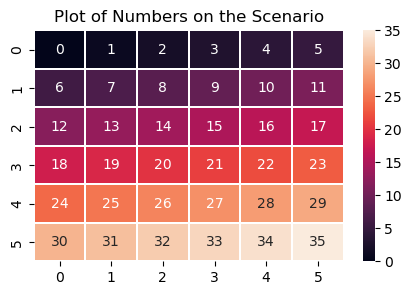

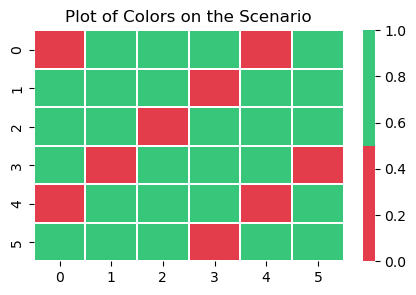

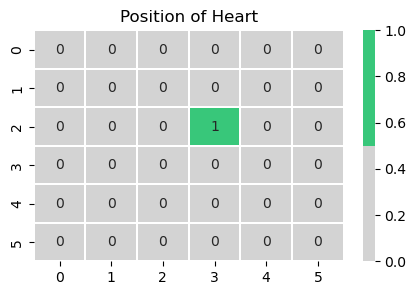

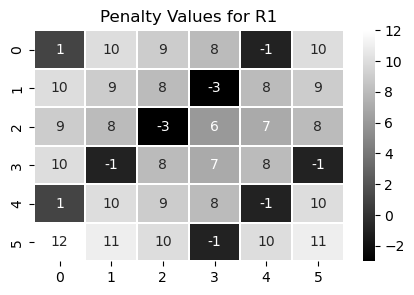

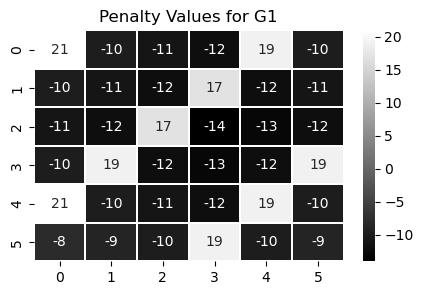

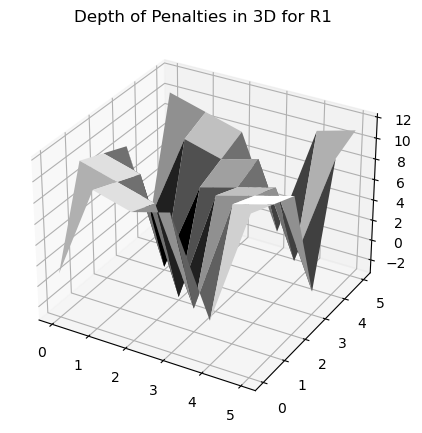

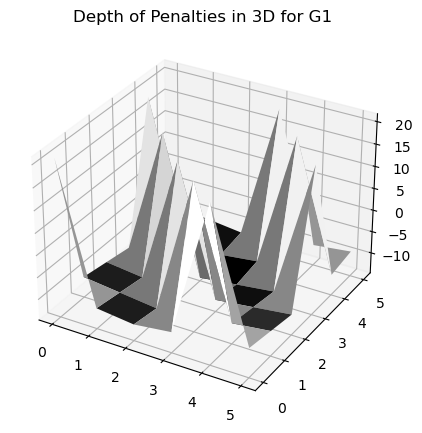

The transitional path is: 
30 24 18 19 13 14 15 
The transitional path is: 
30 31 25 26 20 21 15 


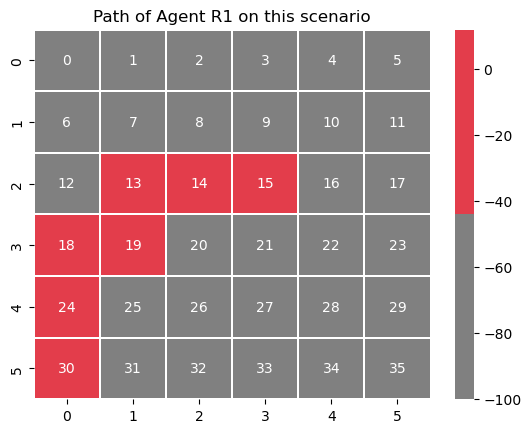

The final path is shown above.
    Start: 30
    Destination: 15
    The total penalty for this path is 33
    The final path and penalties are {15: 6, 14: -3, 13: 8, 19: -1, 18: 10, 24: 1, 30: 12}
    


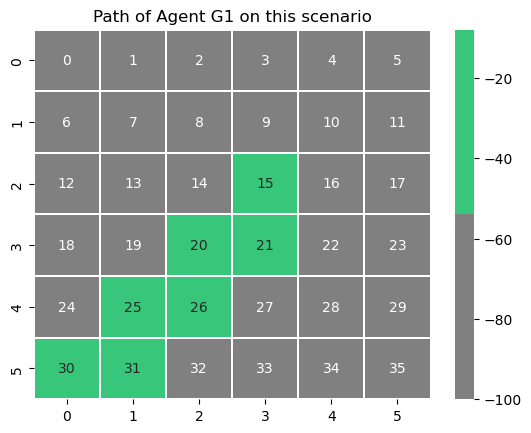

The final path is shown above.
    Start: 30
    Destination: 15
    The total penalty for this path is -77
    The final path and penalties are {15: -14, 21: -13, 20: -12, 26: -11, 25: -10, 31: -9, 30: -8}
    


-77

In [12]:
# Input from the User
_map = [['R', 'G', 'G', 'G', 'R', 'G'],
         ['G', 'G', 'G', 'R', 'G', 'G'],
         ['G', 'G', 'R', 'GH', 'G', 'G'],
         ['G', 'R', 'G', 'G', 'G', 'R'],
         ['R', 'G', 'G', 'G', 'R', 'G'],
         ['G', 'G', 'G', 'R', 'G', 'G']]

# _map = [['R', 'G', 'R', 'G', 'R', 'G'],
#          ['G', 'R', 'G', 'R', 'G', 'R'],
#          ['R', 'G', 'RH', 'G', 'R', 'G'],
#          ['G', 'R', 'G', 'R', 'G', 'R'],
#          ['R', 'G', 'R', 'G', 'R', 'G'],
#          ['G', 'R', 'G', 'R', 'G', 'R']]

try:
    side, flat_map, heart_number, heart_coordinates, heart_color = initialise_map_data(_map)
except:
    print("Kindly provide a heart on the map")
    
# Generating a random position to start
start_number = random.randint(0,len(flat_map)-1)
start_number

print('===='*50)

output_map_R1 = build_map(_map, agent=0)
output_map_G1 = build_map(_map, agent=1)

nodes = make_plots(output_map_R1, output_map_G1)

print('===='*50)

connections_R1, num_pen_R1 = make_connections(output_map_R1)
connections_G1, num_pen_G1 = make_connections(output_map_G1)

graph_R1 = make_graph(connections_R1)
graph_G1 = make_graph(connections_G1)

laid_path_R1 = best_first_search(start_number, heart_number, side*side, graph_R1)
laid_path_G1 = best_first_search(start_number, heart_number, side*side, graph_G1)

print('===='*50)

final_path_R1 = []
final_path_G1 = []
get_final_path(heart_number, final_path_R1, laid_path_R1)
get_final_path(heart_number, final_path_G1, laid_path_G1)

find_final_penalty(final_path_R1, agent=0)
find_final_penalty(final_path_G1, agent=1)